<h1>AutoInland Vehicle Insurance Claim.A solution to learn data science it includes various practice like EDA,feature engineering...<h1>

<h2>PROBLEM STATEMENT <h2>
<h4>When providing insurance, there are very few points of contact between customers and the insurance provider. Because of this, AutoInland (an Insurance company in west Africa with a focus on Auto Insurance) needs to make every point of contact count; one of the most valuable of these is filing and settlement of claims.
AutoInland believes that to achieve better service level standards, they need to anticipate future demands in terms of claims request volume. This will allow them to better manage their resources while keeping the customer experience positive and the levels of satisfaction high.<h4>

<h2>OBJECTIVE OF THE CHALLENGE<h2>
<h4>The objective of this hackathon is to develop a predictive model that determines if a customer will submit a vehicle insurance claim in the next three months. This solution will help streamline financial planning at AutoInland and allow them to better serve their customers by understanding which customers are likely to submit a claim.<h4>

<h3>RESEARCH QUESTIONS<h3>


* What is  the  type of the Machine learning does this problem is?

 - Classification,Supervised Learning.

* Does color has positive correlation with insurance,Example Black,White,Grey.

* Can Gender affects the insurance claims ?

* is there any relationship between state/region and insurance claims


<h2>IMPORTING THE IMPORTANT PACKAGES <h2>

In [44]:
#Import the required libaries 
import pandas as pd 
import numpy as np 
import datetime as dt #used for datatime datatype 
import seaborn as sns #used for visualization and EDA 
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score #used for metric evaluation 
from lightgbm import LGBMClassifier #algorithm  for classification 
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold #used for cross validation 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold#used for cross validation by kfold 
import warnings
warnings.filterwarnings('ignore')


<h2>LOADING THE DATA FROM CSV FILE  <h2>

In [45]:
#Loading the Data from csv file for displaying 
pd.set_option('display.max_columns',900000) #used to show or display the all columns in dataset 
pd.set_option('display.max_rows',None) #used to display the all rows in a dataset 
pd.set_option('display.width',700000)
train=pd.read_csv('Train.csv') #loading the train data 
test=pd.read_csv('Test.csv')  #loading the test data 
sub=pd.read_csv('SampleSubmission.csv') #loading the sample submmission
nigeriansName=pd.read_csv('NigerianStateNames.csv') #loading the Nigerian State Names 

<h2>EXPLORE THE DATA<h2>

In [46]:
#Loading the train dataset 
print('''it is true that the train dataset contains the target column that is between 0 and 1 ,hence Binary classification''')
train.head() #loads for first five  rows only 

it is true that the train dataset contains the target column that is between 0 and 1 ,hence Binary classification


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [47]:
#Loading the test dataset 
print('''it is true that the test dataset does not contain the target ,hence it used for the testing a model and find predictions''')
test.head() #loads only the first five rows only 

it is true that the test dataset does not contain the target ,hence it used for the testing a model and find predictions


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


In [48]:
#Loading the SampleSubmission file 
print('''it is true that the sample submission contains only ID and target where the predictions will be put in ''')
sub.head() #loads only the first five rows 

it is true that the sample submission contains only ID and target where the predictions will be put in 


,ID,target
0,ID_01QM0NU,0
1,ID_024NJLZ,0
2,ID_02NOVWQ,0
3,ID_02VSP68,0
4,ID_02YB37K,0


In [49]:
#Loading the Nigerian Names to gain more insights on the data,it contains LGA and State 
nigeriansName

,LGA,State
0,Abadam,Borno State
1,Abaji,Federal Capital Territory
2,Abak,Akwa Ibom State
3,Abakaliki,Ebonyi State
4,Aba-North,Abia State
5,Aba-South,Abia State
6,Abeokuta-North,Ogun State
7,Abeokuta-South,Ogun State
8,Abi,Cross River State
9,Aboh-Mbaise,Imo State


In [50]:
#Explore the more information about the train,example the data type of the columns,number of columns. 
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      12079 non-null  object
 1   Policy Start Date       12079 non-null  object
 2   Policy End Date         12079 non-null  object
 3   Gender                  11720 non-null  object
 4   Age                     12079 non-null  int64 
 5   First Transaction Date  12079 non-null  object
 6   No_Pol                  12079 non-null  int64 
 7   Car_Category            8341 non-null   object
 8   Subject_Car_Colour      5117 non-null   object
 9   Subject_Car_Make        9603 non-null   object
 10  LGA_Name                5603 non-null   object
 11  State                   5591 non-null   object
 12  ProductName             12079 non-null  object
 13  target                  12079 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 1.3+ MB


In [51]:
#Checking the total missing values in train dataset 
train.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
dtype: int64

In [52]:
#Explore the more information about the test,example the data type of the columns,number of columns. 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      1202 non-null   object
 1   Policy Start Date       1202 non-null   object
 2   Policy End Date         1202 non-null   object
 3   Gender                  1161 non-null   object
 4   Age                     1202 non-null   int64 
 5   First Transaction Date  1202 non-null   object
 6   No_Pol                  1202 non-null   int64 
 7   Car_Category            830 non-null    object
 8   Subject_Car_Colour      505 non-null    object
 9   Subject_Car_Make        954 non-null    object
 10  LGA_Name                546 non-null    object
 11  State                   546 non-null    object
 12  ProductName             1202 non-null   object
dtypes: int64(2), object(11)
memory usage: 122.2+ KB


In [53]:
#Checking the total missing values in test  dataset 
test.isnull().sum()

ID                          0
Policy Start Date           0
Policy End Date             0
Gender                     41
Age                         0
First Transaction Date      0
No_Pol                      0
Car_Category              372
Subject_Car_Colour        697
Subject_Car_Make          248
LGA_Name                  656
State                     656
ProductName                 0
dtype: int64

In [54]:
#Checking the Shape of the trian,sub,test dataset respectively. 
train.shape,sub.shape,test.shape 

((12079, 14), (1202, 2), (1202, 13))

<h2>DATA VISUALIZATION AND EDA <h2>

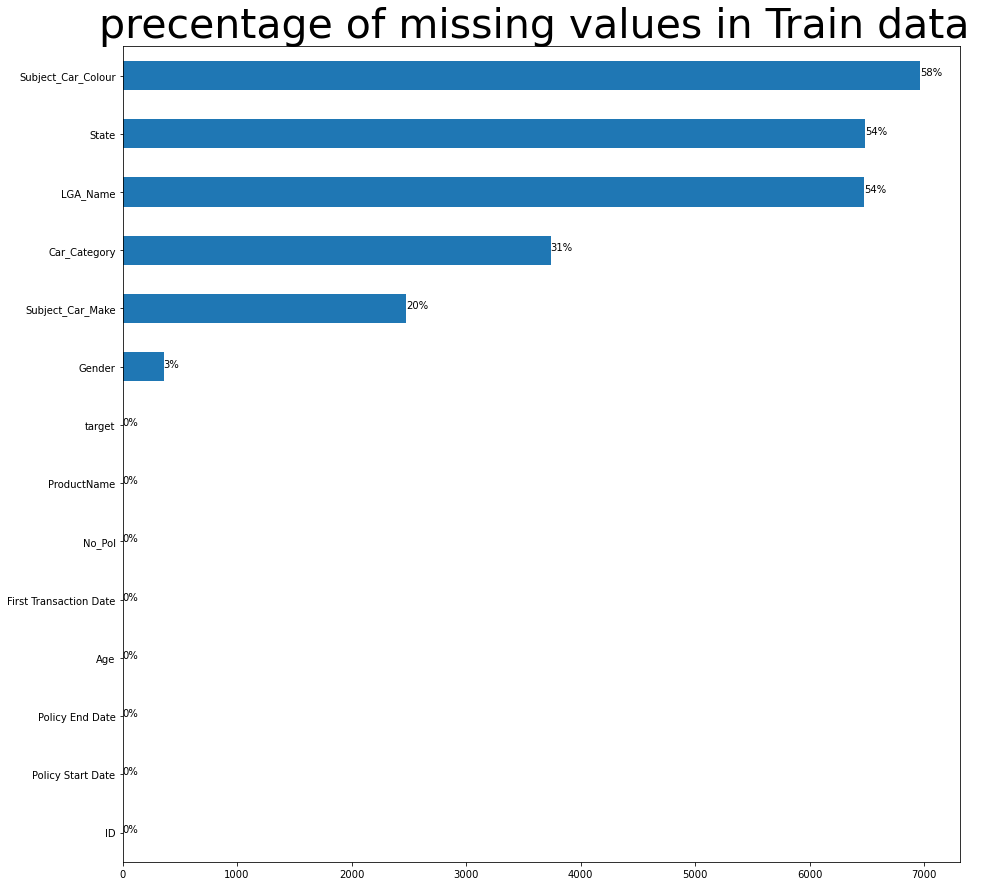

In [55]:
#check for missing values in the train data file by using graph to gain insight 
graph= train.isna().sum().sort_values().plot(kind = 'barh', figsize = (15, 15))
plt.title('precentage of missing values in Train data ', fontdict={'size':41})
for p in graph.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    plt.annotate(percentage,(x,y))

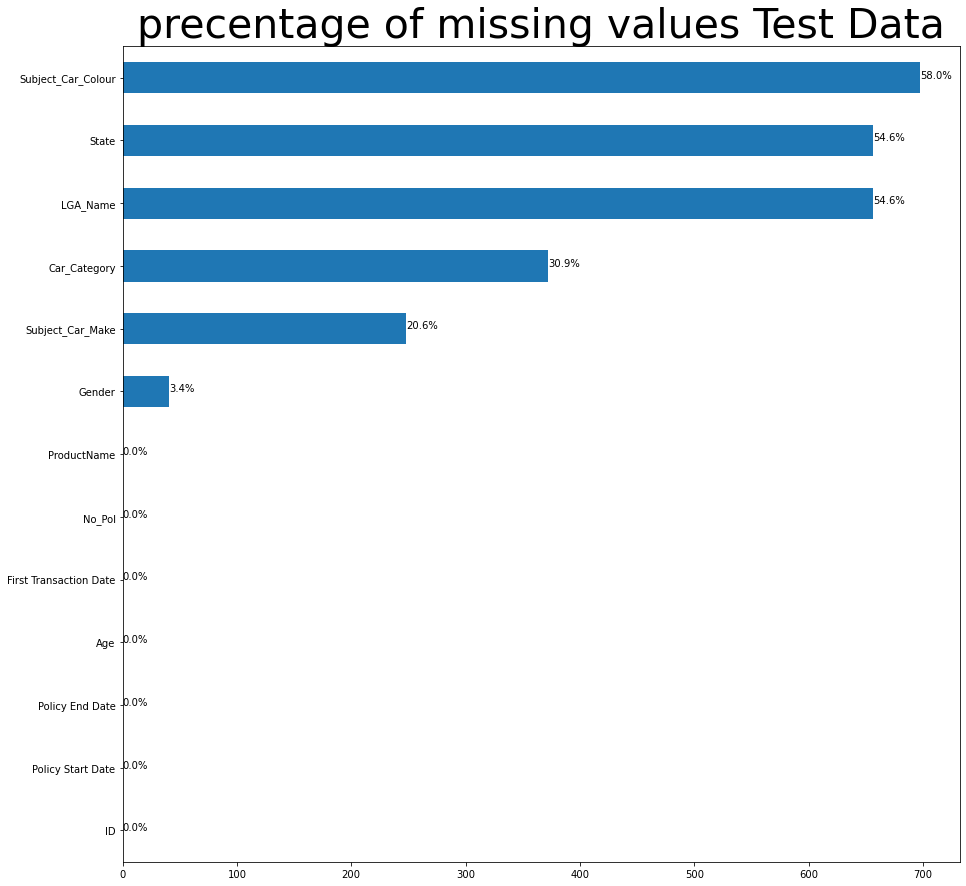

In [56]:
#check for missing values in the test data file by using graph to gain insight
graph = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (15, 15))
plt.title('precentage of missing values Test Data', fontdict={'size':41})

for p in graph.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    plt.annotate(percentage,(x,y))


* As it shown above on Graph that the percantage of the  missing values in train and test are not far apart 

Text(0.5, 1.0, 'Distribution of the target')

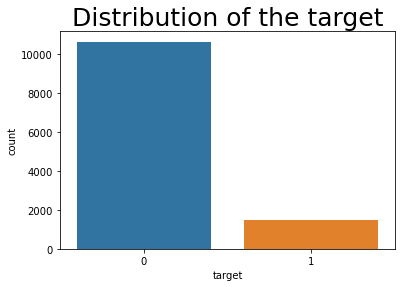

In [57]:
#here use graph to check the ditribution of the target  in Train data set 
sns.countplot(train.target)
plt.title('Distribution of the target', fontdict={'size':25})

* As it shown above that there are many customers are likely  not  to submit a claim within 3 months from their first transaction.

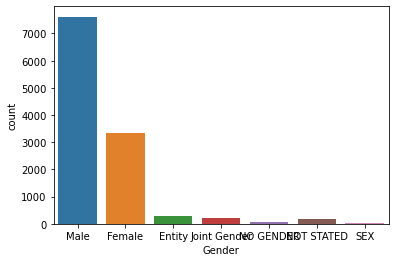

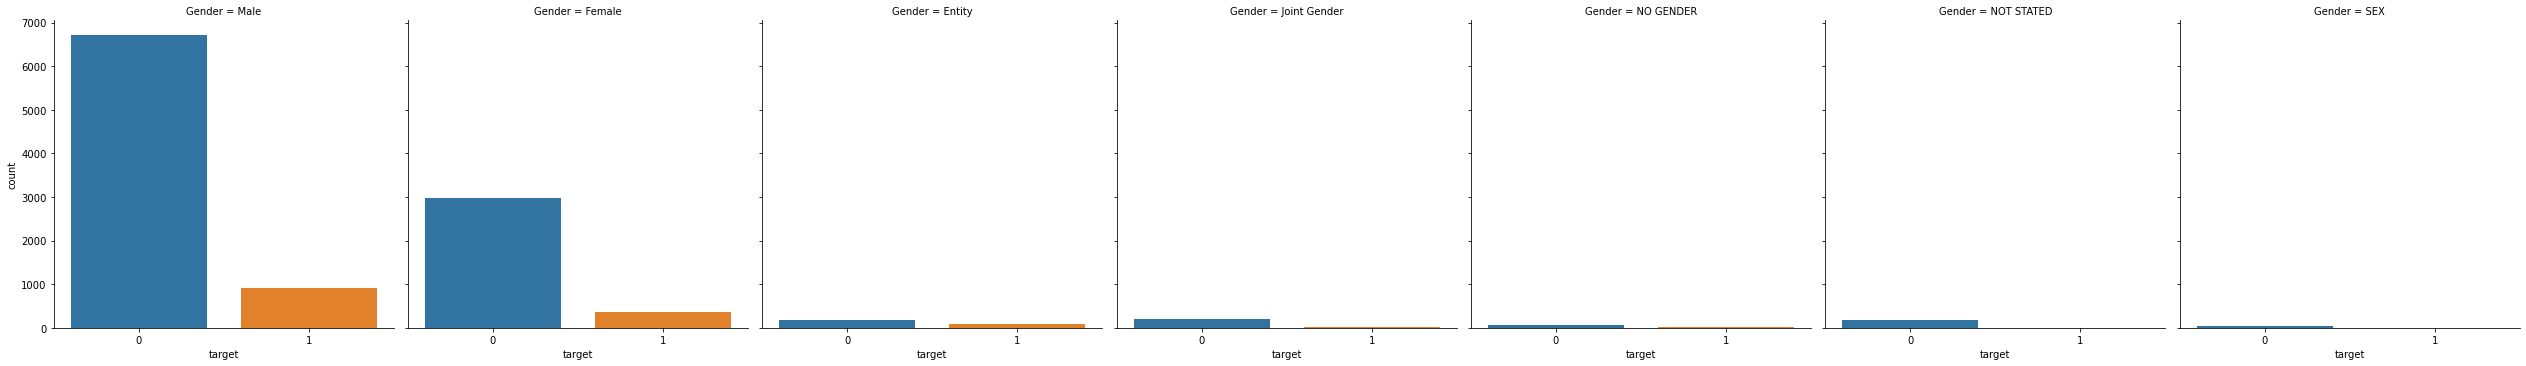

In [58]:
sns.countplot(x='Gender', data=train);
sns.factorplot(x='target', col='Gender', kind='count', data=train);

* The above graphs  shows that Male gender are more likely to  submits the claims .

In [59]:
train['Gender'].value_counts() #Explore the counts on each values found in gender column  train data 

Male            7617
Female          3327
Entity           277
Joint Gender     223
NOT STATED       175
NO GENDER         66
SEX               35
Name: Gender, dtype: int64

In [60]:
test['Gender'].value_counts() #Explore the counts on each values found in gender column in test data 

Male            739
Female          352
Entity           23
Joint Gender     15
NOT STATED       15
NO GENDER        10
SEX               7
Name: Gender, dtype: int64

In [61]:
y=train['target'] # target columns


In [62]:
train['spliter'] ='train'
test['spliter'] ='test' # creating a new column  called spliter to distinguish between train and test that later will be used to split again the totaldata into respectively original train and test data .
totaldata =pd.concat([train,test],ignore_index=True,sort=False)#Concatenate the train and test data to form the totaldata for easily performing data cleaning up,transformation and imputing. 


In [63]:
#Check the percentage of the null values in total data after concatenating the train and test data 
nul = totaldata.isnull().sum().reset_index()
nul.columns = ["columnms","Nulls"]
nul["Percentage"] = [str(round(i,3))+ "%" for i in round(nul.Nulls/totaldata.shape[0],3)*100]
nul



,columnms,Nulls,Percentage
0,ID,0,0.0%
1,Policy Start Date,0,0.0%
2,Policy End Date,0,0.0%
3,Gender,400,3.0%
4,Age,0,0.0%
5,First Transaction Date,0,0.0%
6,No_Pol,0,0.0%
7,Car_Category,4110,30.9%
8,Subject_Car_Colour,7659,57.7%
9,Subject_Car_Make,2724,20.5%


<h2>DATA CLEANING,TRANSFORMATION,IMPUTING,FEATURE ENGINEERING<h2>


In [64]:
#Data cleaning up by Deleting or droping  the some columns  from the dataset 
del totaldata['target'] #delete the target since it is already saved in a y variable above 
del totaldata['ID'] #delete the ID columns since it has no any correration with the target column.
del totaldata['Subject_Car_Colour'] #delete the subject_car_colour 
del totaldata['First Transaction Date'] #delete the First Transaction Date 


In [65]:
#Checking the shape of the totaldata formed 
totaldata.shape 


(13281, 11)

In [66]:
#Checking the information of the totaldata formed to gain more insights on the data like the data type of the columns 
totaldata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Policy Start Date  13281 non-null  object
 1   Policy End Date    13281 non-null  object
 2   Gender             12881 non-null  object
 3   Age                13281 non-null  int64 
 4   No_Pol             13281 non-null  int64 
 5   Car_Category       9171 non-null   object
 6   Subject_Car_Make   10557 non-null  object
 7   LGA_Name           6149 non-null   object
 8   State              6137 non-null   object
 9   ProductName        13281 non-null  object
 10  spliter            13281 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [67]:
#Checking the nulls values in the totaldata formed 
totaldata.isnull().sum()


Policy Start Date       0
Policy End Date         0
Gender                400
Age                     0
No_Pol                  0
Car_Category         4110
Subject_Car_Make     2724
LGA_Name             7132
State                7144
ProductName             0
spliter                 0
dtype: int64

In [68]:
#Data Transformation ,Changing the object columns to the  respectively data type of datatime 
totaldata['Policy Start Date']=pd.to_datetime(totaldata['Policy Start Date']) #changing policy Start Date to the datetime 
totaldata['Policy End Date']=pd.to_datetime(totaldata['Policy End Date']) #changing the policy End Date to datetime 


In [69]:
totaldata['Age'].value_counts() #checking the total counts on each values in Age columns 


 40      900
 50      686
 41      550
 36      537
 38      514
 37      484
 35      480
 42      471
 34      444
 39      423
 45      406
 120     396
 44      385
 20      356
 30      351
 43      342
 32      340
 46      327
 33      326
 31      324
 1       254
 48      248
 51      212
 47      190
 52      189
 49      173
 53      159
 54      152
 60      149
 29      135
 56      135
 55      134
 28      124
 27      104
 61      100
 64       93
 66       89
 57       88
 62       84
 58       84
 63       72
 12       71
 59       69
 65       63
 25       56
 68       56
 2        54
 69       52
 72       51
 70       49
 67       48
 10       45
 71       45
 26       44
 75       41
 73       38
 76       33
 3        29
 74       29
 6        27
 78       23
 5        22
 24       22
 7        21
 80       19
 93       19
 81       18
 77       14
 11       14
 4        14
 19       14
 22       12
 9        12
 320      12
 21       12
 84       11
 23       11

<AxesSubplot:ylabel='Age'>

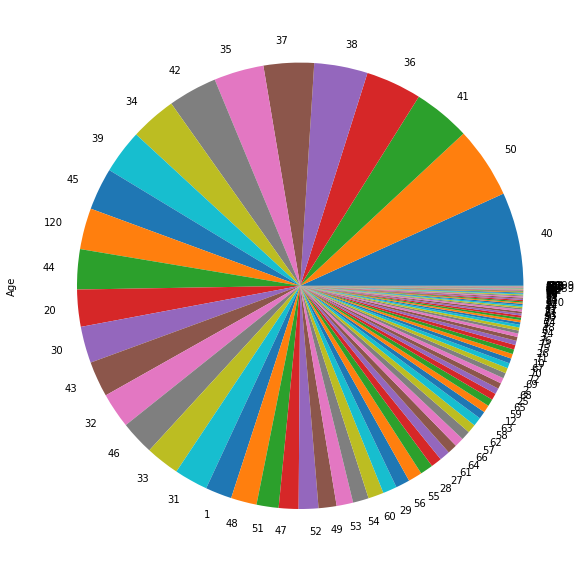

In [70]:
#By using the graph to check for the total counts on each value of the totaldata in Age 
totaldata['Age'].value_counts().plot(kind = "pie" , figsize = (10,11)) 
#it seems there are many outliers

In [71]:
#Data cleaning up,Filling the outliers with the null values in between values 
totaldata['Age'] = np.where(totaldata['Age'].between(-6099,1), np.NaN, totaldata['Age'])
totaldata['Age'] = np.where(totaldata['Age'].between(90,320), np.NaN, totaldata['Age'])

In [72]:
#Feature Engineering,Extracting the other features like year,day,month and quarter from the date columns in the dataset 
totaldata['Policy Start Date_year']=totaldata['Policy Start Date'].dt.year #Extracting the data from the Policy Start Date
totaldata['Policy Start Date_day']=totaldata['Policy Start Date'].dt.day  
totaldata['Policy Start Date_month']=totaldata['Policy Start Date'].dt.month
totaldata['Policy Start Date_quarter']=totaldata['Policy Start Date'].dt.quarter 
totaldata['Policy End Date_year']=totaldata['Policy End Date'].dt.year #Extracting the Data from the  Policy End Date 
totaldata['Policy End Date_day']=totaldata['Policy End Date'].dt.day 
totaldata['Policy End Date_month']=totaldata['Policy End Date'].dt.month 
totaldata['Policy End Date_quarter']=totaldata['Policy End Date'].dt.quarter 



In [73]:
del totaldata['Policy End Date'] #Deleting the columns of date since are no longer  needed 
del totaldata['Policy Start Date'] #deleting the columns of date since are no longer needed 


In [74]:
totaldata['Gender'].value_counts() #checking the total counts of the each value in Gender column 


Male            8356
Female          3679
Entity           300
Joint Gender     238
NOT STATED       190
NO GENDER         76
SEX               42
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

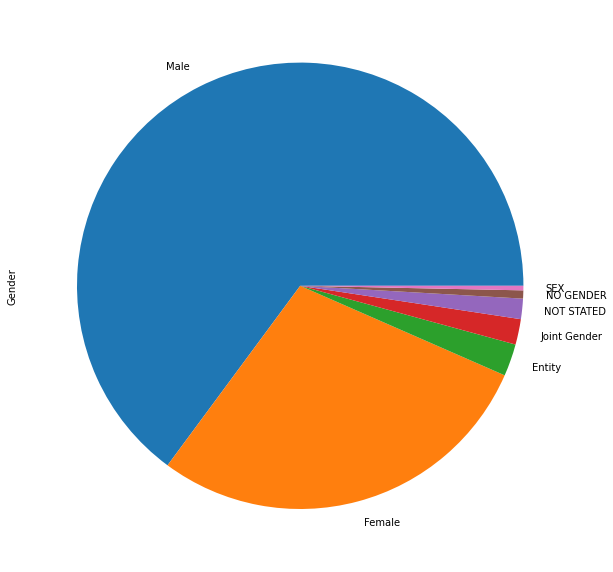

In [75]:
#By using the graph to check for the total counts on each value of the totaldata in Age 
totaldata['Gender'].value_counts().plot(kind = "pie" , figsize = (10,11)) 


In [76]:
#Data cleaning,Replacing the categorical values in the Gender columns with null values 
totaldata['Gender'] =totaldata['Gender'].replace({"NO GENDER": "NOT STATED","SEX": np.NaN,"NO GENDER": np.NaN,'Joint Gender': np.NaN,'Entity':np.NaN})
totaldata['Gender'].fillna(np.NaN, inplace=True)


In [77]:
totaldata['Policy End Date_year'].value_counts() #checking the total value counts in column Policy End Date_year 


2011    13096
2010      177
2016        2
2041        2
2012        2
2034        1
2037        1
Name: Policy End Date_year, dtype: int64

In [78]:
#Data cleaning up,By replacing the outliers with the null values 
totaldata['Policy End Date_year'] = np.where(totaldata['Policy End Date_year'].between(2015,2041), np.NaN, totaldata['Policy End Date_year'])



In [79]:
#Replacing the states with the corrected details given in Nigeria State  names to increase the accurancy of the model with correct information!
totaldata['State'] = totaldata['State'].replace({'Abuja-Municipal':'Federal Capital Territory','Oshodi-Isolo':'Lagos','Ibeju-Lekki':'Lagos','Ibadan-West':'Ibadan','Eti-Osa':'Lagos'             ,'Obia-Akpor':'Awka-Ibom','Ibadan-East':'Oyo','Amuwo-Odofin':'Lagos','ENUGU-EAST':'Enugu','Esan-West':'Edo','Obafemi-Owode':'Ogun','Orile-Iganmu':'Lagos', 'Ifako-Ijaye':'Lagos', 'Ibadan-North':'Oyo',
'Jos-North':'Plateau','Ondo-West':'Ondo','Kaduna-North':'Kaduna','Aniocha-South':'Delta','Ile-Oluji':'Ondo','Nnewi-North':'Anambra'
,'Aboh-Mbaise':'Imo', 'Akoko-West':'Ondo','Warri-Central':'Edo', 'Jos-South':'Plateus','Onitsha-North':'Anambra','Ajeromi-Ifelodun':'Osun', 'Kano-Municipal':'Kano','Ife-Central':'Osun','Ilorin-West':'Kwara'
,'Lagelu-North':'Oyo', 'Owerri-Municipal':'Imo','Nsit-Ubium':'Awka-Ibom', 'Udi-Agwu':'Enugu','Owerri-West':'Imo','Ogbmosho-South':'Oyo', 'Umuahia-South':'Abia','Ajegunle-State':'Lagos','Ekiti-West':'Ekiti',
'Ogun-Waterside':'Ogun','Awka-North':'Anambra','ABULE-EGBA':'Lagos','Ife-North':'Osun', 'Anambra-East':'Anambra', 'Etsako-West':'Edo'
,'Aba-North':'Abia','Ibarapa-Central':'Oyo','Idemili-North':'Anambra', 'Ogba-Ndoni':'Rivers','Calabar-Municipality':'Cross-River','AJAO-ESTATE':'Lagos','Ekiti-East':'Ekiti','Ovia-SouthWest':'Edo','Essien-Udim':'Akwa-Ibom','Ado-Ota':'Ogun','Oyo-East':'Oyo', 'Ilorin-East':'Kwara','Ilesha-West':'Osun','Central-Abuja':'Federal Capital Territory','Owerri-North':'Imo','Ilesha-East':'Osun', 'Awka-South':'Delta','Enugu-North':'Enugu','Ibadan':'Oyo',
'Esan-Central':'Edo', 'Isoko-south':'Delta','Ethiope-East':'Delta','Ijebu-Ode':'Ogun','QuaAn-Pan':'Plateus', 'Warri-North':'Delta', 'Ado-Ekiti':'Ekiti','Ijebu-East':'Ogun','Onitsha-South':'Anambra', 'Ughelli-North':'Delta','Warri-South':'Delta', 'Kaduna-South':'Kaduna',
'Port-Harcourt':'Rivers','N-A':np.NaN, 'Idemili-south': 'Anambra', 'Ngor-Okpala':'Imo','Oyo-West':'Oyo', 'Aba-South':'Abia', 'Isoko-North':'Delta','Oshimili-North':'Delta','Ndokwa-East':'Delta', 'Nnewi-South':'Anambra', 'ENUGU-SOUTH':'Enugu','Ijebu-North':'Ogun',
'Asari-Toru':'Rivers','Akwa-Ibom':'Awka-Ibom'})



In [80]:
#Cleaning up the State 
totaldata.State.fillna(np.NaN,inplace =True) #Filling the State with the null values 

In [81]:
#Also in LGA_NAme given check the correct details and fill apropriate 
totaldata['LGA_Name']=totaldata.LGA_Name.replace({'LGA':np.NaN}) #Replacing  the details
totaldata.LGA_Name.fillna(np.NaN,inplace =True) #filling with the null values in LGA_Name 




In [82]:
#Data Cleaning up by filling the missing values in the categorical columns with the Mode 
#and changing the data type to the category .
totaldata['State'] = totaldata['State'].fillna(totaldata['State'].mode()[0]).astype('category')
totaldata['ProductName'] = totaldata['ProductName'].fillna(totaldata['ProductName'].mode()[0]).astype('category')
totaldata['Car_Category'] = totaldata['Car_Category'].fillna(totaldata['Car_Category'].mode()[0]).astype('category')
totaldata['Subject_Car_Make'] = totaldata['Subject_Car_Make'].fillna(totaldata['Subject_Car_Make'].mode()[0]).astype('category')
totaldata['Gender'] = totaldata['Gender'].fillna(totaldata['Gender'].mode()[0]).astype('category')
totaldata['LGA_Name'] = totaldata['LGA_Name'].fillna(totaldata['LGA_Name'].mode()[0]).astype('category')





In [83]:
#Splitting of the columns back to  the original test and train by using the spliter column.
train = totaldata.loc[totaldata['spliter']=='train']
test = totaldata.loc[totaldata['spliter']=='test']



In [84]:
#Droping the Spliter columns,since it is not needed anymore !
train.drop('spliter',axis=1,inplace=True)
test.drop('spliter',axis =1,inplace =True)



In [85]:
#Take the train to clean train_data
train_clean_data = train
#Take the test to the clean_test data 
test_clean_data = test



<h2>BUILDING THE MODEL<h2>

In [86]:
#Here the cross validation by using the StratifiedKfold used to split the data into train,test and validation and repeatedly and Using the LGBMClassifier as Algorithm for building the model 
skf =StratifiedKFold(n_splits=10, shuffle=True,random_state=2021) # for cross validation by StratifiedKfold
scores = [] #list to store the sores obtained in training the model 
preds= [] #list to store the predictions 
#creating a for loop for the stratified k fold to perform the cross validation 
i = 1
for train, test in skf.split(train_clean_data, y):
    x_train, x_test=train_clean_data.iloc[train],train_clean_data.iloc[test] #spliting the data for x 
    y_train, y_test =y.iloc[train],y.iloc[test] #spliting the data for y 
    model = LGBMClassifier(learning_rate=0.22,n_estimators = 96,cat_smooth=10,metrics='binary_error',          scale_pos_weight= 3.6,max_depth=16,num_leaves=49,reg_lambda=0.3) #Creating the model and tuning it with the different parameter 
    model.fit(x_train, y_train)# fitting  the model on train data
    print(i,'Split Trained') #print the splits that trained 
    score = f1_score(y_test,model.predict(x_test)) # checking the accuracy of the model 
    pred =model.predict_proba(test_clean_data)[:,1] # making prediction
    scores.append(score)
    preds.append(pred)
    i += 1
print('Total Mean Score Obtained :',np.mean(scores))
preds_mean = np.mean(preds, axis=0)# mean of all the predictions
final = [] #list to store the final results 
for x in preds_mean:
    if x >= 0.51:
        final.append(1)
    else:
        final.append(0)
submit = sub.copy() #Copy the submission file to the variable submit 
submit.target = final
submit.to_csv('INNOCENTalwayswin1.csv',index=False) #creating and naming the file ready for submission



1 Split Trained
2 Split Trained
3 Split Trained
4 Split Trained
5 Split Trained
6 Split Trained
7 Split Trained
8 Split Trained
9 Split Trained
10 Split Trained
Total Mean Score Obtained : 0.38088315353468494


<h4>Public   Leaderboard  0.506046930303<h4>
<h4>Private  Leaderboard  0.511111111111<h4>
<h2>REQUIREMENT<h2>



* pandas    1.2.4 
* numpy     1.19.5 
* seaborn   0.11.1 
* lightgbm  3.2.1 
* sklearn   0.24.2 
* python    3.9.2 


